<a href="https://colab.research.google.com/github/DSilvia08/Para-entregar/blob/main/Tarea_Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
#Inventario

In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definición de las demandas
def demanda(u):
    intervalos = [
        (0.000, 0.010, 35), (0.010, 0.025, 36), (0.025, 0.045, 37), (0.045, 0.065, 38),
        (0.065, 0.087, 39), (0.087, 0.110, 40), (0.110, 0.135, 41), (0.135, 0.162, 42),
        (0.162, 0.190, 43), (0.190, 0.219, 44), (0.219, 0.254, 45), (0.254, 0.299, 46),
        (0.299, 0.359, 47), (0.359, 0.424, 48), (0.424, 0.494, 49), (0.494, 0.574, 50),
        (0.574, 0.649, 51), (0.649, 0.719, 52), (0.719, 0.784, 53), (0.784, 0.844, 54),
        (0.844, 0.894, 55), (0.894, 0.934, 56), (0.934, 0.964, 57), (0.964, 0.980, 58),
        (0.980, 0.995, 59), (0.995, 1.000, 60)
    ] #una lista de tuplas que contienen X_i, X_i+1, y demanda correspondiente x
    for inicio, fin, valor in intervalos:
        if inicio <= u < fin: #X_i < R < X_i+1
            return valor #retorna la demanda X

In [4]:
def Factores_estacionales(i): #Factores estacionales para cada mes del año
    FE = [
        (1.20, 1), (1.00, 2), (0.90, 3), (0.80, 4), (0.80, 5), (0.70, 6),
        (0.80, 7), (0.90, 8), (1.00, 9), (1.20, 10), (1.30, 11), (1.40, 12)
    ] #lista de tuplas, que tiene cada una factor estacional y Mes correspondiente
    for factor, mes in FE:
        if mes == i:
            return factor #regresa el factor del mes i

In [5]:
def tiempos_entrega(u): #Tiempo de entregas, probabilidad de que la orden llegue en:
    if 0.00 < u < 0.30:
        return 1  # un mes
    elif 0.30 < u < 0.70:
        return 2  # dos meses
    elif 0.70 < u < 1.00:
        return 3  # tres meses

In [13]:
# Inicialización de variables
inicial_inventario = 150
R = 100 #nivel de reorden
q = 200 #cantidad a ordenar
#listas para guardar los datos para la tabla
Inicial = [] #empieza con un inventario de 150
NumAleatorio = [] #el que se manda a la función demanda(u)
DemandaAjustada = [] #factor estacional * demanda
Final = [] #inventario final
Faltante = [] #inventario queda negativo, faltante=abs(final)
Orden = [] #almacena las ordenes que se hicieron y las que no, no pone nada
Promedio = [] #Inventario mensual promedio
agregaciones_futuras = []
suma_programada = False #indica si se hizo una orden False=No, True=sí
Ordn=0 #conteo de ordenes inicializada en 0
#
# Simulación
for i in range(1, 13):
    # Sumar al inventario las agregaciones programadas para esta iteración
    for j in range(len(agregaciones_futuras)):
        if agregaciones_futuras[j][0] == i:
            inicial_inventario += agregaciones_futuras[j][1]
            print(f"En la iteración {i}, se suma {agregaciones_futuras[j][1]} al inventario.")
            #mensaje que indica en qué iteración (mes) llega la orden
    # Eliminar las agregaciones que ya se han procesado
    agregaciones_futuras = [a for a in agregaciones_futuras if a[0] != i]

    # Calcular el inventario final después de la demanda
    Inicial.append(inicial_inventario) #agrega el incial
    u1 = round(rnd.uniform(0, 1),6) #genera un número aleatorio entre 0 y 1
                                    #con 6 decimales
    NumAleatorio.append(u1) #agrega el número aleatorio a la lista
    D = demanda(u1) #valor de demanda
    FE = Factores_estacionales(i) #factor estacional del mes i
    DA = round(D * FE) #Demanda ajustada = demanda * Factor estacional
    DemandaAjustada.append(DA) #agrega la demanda ajustada a la lista correspondiente
    Fina = inicial_inventario - DA #inventario final
    print(f"Iteración {i}: Inventario Inicial: {inicial_inventario}, Demanda: {D}, Inventario Final: {Fina}")

    # Revisar si el inventario final es menor que R
    if Fina < R and not suma_programada: #cuando es menor que R se hace una orden
        u2 = rnd.random()
        X = tiempos_entrega(u2)
        agregaciones_futuras.append((i + X, q)) #agrega la orden a la lista de agregaciones
           #en el mes i+X meses agrega 200 al inventario inicial
        Ordn=Ordn+1 #se hizo una orden
        Orden.append(Ordn) #se registra
        print(f"Se programó sumar 200 al inventario en la iteración {i + X}.") #mensaje de que se programó en cierta iteración
        suma_programada = True  # Indicar que ya se ha programado una suma
                #no se vuelve a hacer una orden hasta que la que se hizo llegue
    else:
        Orden.append("") #no se registra nada si no hubo orden y/o en espera de la orden

    # Si la condición Final < R no se cumple, resetear el indicador
    if Fina >= R:
        suma_programada = False #no hay orden programada y/o en espera de una anterior

    if Fina <= 0:
        Falt=abs(Fina) #inventario en 0, Faltante es demanda insatisfecha
        Faltante.append(Falt)
        Fina=0 # El inventario no puede ser negativo
        Final.append(Fina)
    else:
        Final.append(Fina)
        Falt=0 #inventario positivo
        Faltante.append(0) #no hay faltante

    if Fina>0:
      IMProm = (inicial_inventario + Fina) / 2 #inventario positivo
    else:
      IMProm = (inicial_inventario/2)*(inicial_inventario/DA) #inventario negativo/en cero
    Promedio.append(IMProm)

    # Actualizar el inventario inicial para la siguiente iteración
    inicial_inventario = Fina-Falt #Inventario final - Faltante

Iteración 1: Inventario Inicial: 150, Demanda: 47, Inventario Final: 94
Se programó sumar 200 al inventario en la iteración 2.
En la iteración 2, se suma 200 al inventario.
Iteración 2: Inventario Inicial: 294, Demanda: 54, Inventario Final: 240
Iteración 3: Inventario Inicial: 240, Demanda: 53, Inventario Final: 192
Iteración 4: Inventario Inicial: 192, Demanda: 50, Inventario Final: 152
Iteración 5: Inventario Inicial: 152, Demanda: 41, Inventario Final: 119
Iteración 6: Inventario Inicial: 119, Demanda: 54, Inventario Final: 81
Se programó sumar 200 al inventario en la iteración 9.
Iteración 7: Inventario Inicial: 81, Demanda: 49, Inventario Final: 42
Iteración 8: Inventario Inicial: 42, Demanda: 51, Inventario Final: -4
En la iteración 9, se suma 200 al inventario.
Iteración 9: Inventario Inicial: 196, Demanda: 46, Inventario Final: 150
Iteración 10: Inventario Inicial: 150, Demanda: 49, Inventario Final: 91
Se programó sumar 200 al inventario en la iteración 12.
Iteración 11: Inve

In [14]:
# Mostrar los resultados en forma de tabla
print("{:<5} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format("Mes", "Inicial", "NumeroA", "DA", "FINAL", "Faltante", "Orden", "Inventario Promedio"))
for i in range(12):
    print("{:<5} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
        i + 1, Inicial[i], NumAleatorio[i], DemandaAjustada[i], Final[i], Faltante[i], Orden[i], Promedio[i]
    ))

Mes   Inicial         NumeroA         DA              FINAL           Faltante        Orden           Inventario Promedio
1     150             0.332002        56              94              0               1               122.0          
2     294             0.837954        54              240             0                               267.0          
3     240             0.776094        48              192             0                               216.0          
4     192             0.530487        40              152             0                               172.0          
5     152             0.111464        33              119             0                               135.5          
6     119             0.841254        38              81              0               2               100.0          
7     81              0.488335        39              42              0                               61.5           
8     42              0.58104         46            

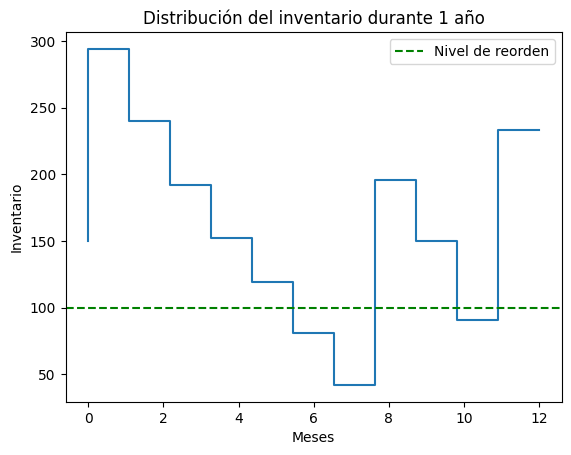

In [15]:
x=np.linspace(0,12,12) #en un año
plt.step(x,Inicial) #Distribución del inventario durante 1 año
plt.axhline(100, color='g', linestyle='--', label="Nivel de reorden")
plt.xlabel('Meses')
plt.ylabel('Inventario')
plt.title('Distribución del inventario durante 1 año')
plt.legend()
plt.show()

Costo de ordenar = \$100 orden


Costo de inventario = \$20/unidad/año


Costo de faltante = \$50/unidad

In [16]:
# Tabla de costos
print("{:<15} {:<25} {:<15} {:<15}".format("C Ordenar", "C. llevar inventario", "C. faltante", "total")) #encabezado
A=Ordn*100 #Costo de ordenar * número de ordenes que se hicieron
B=sum(Final)*20 #Costo de llevar inventario * suma de inventario final
C=sum(Faltante)*50 #penalización por demanda insatisfecha
D=A+B+C #total
print("{:<15} {:<25} {:<15} {:<15}".format(
        A,B,C,D)) #datos de la tabla

C Ordenar       C. llevar inventario      C. faltante     total          
300             27120                     200             27620          
